In [4]:
import deorbit
import numpy as np
import matplotlib.pyplot as plt
from deorbit.observer import Observer
from deorbit.utils.dataio import load_sim_data, load_sim_config
from tqdm import tqdm

In [5]:
# Running simulator
save_path = "eg/obs_example_2d/"

sim_data = load_sim_data(save_path)
sim_config = load_sim_config(save_path)

if sim_data is None or sim_config is None:
    sim = deorbit.simulator.run(
        "RK4",
        "coesa_atmos_fast",
        initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
        time_step=2,
    )
    sim_data = sim.gather_data()
    sim_config = sim.export_config()
    sim.save_data(save_path)
else:
    print("Loaded data from file")

Loaded data from file


In [3]:
#initialising observer class with sim data
obs = Observer(number_of_radars=3, dim=2)




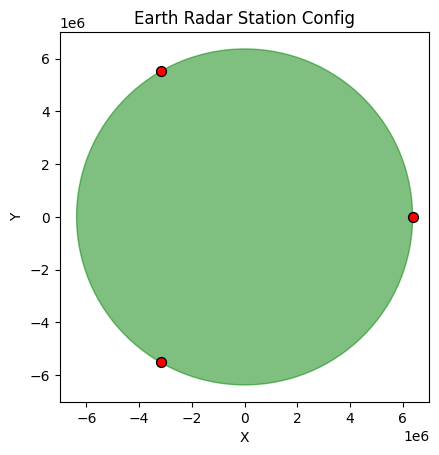

In [4]:
#can plot the radar location
obs.plot_config()

In [5]:
#or can print their coordinates, in longitude/latitudes in radians
print(obs.positions_of_radars)

[0.        2.0943951 4.1887902]


In [6]:
#this runs every 10 time steps of the sim data 
sim_states = sim_data.state_array()
obs.run(sim_states, sim_data.times, 100)

print(len(obs.observed_times))


571


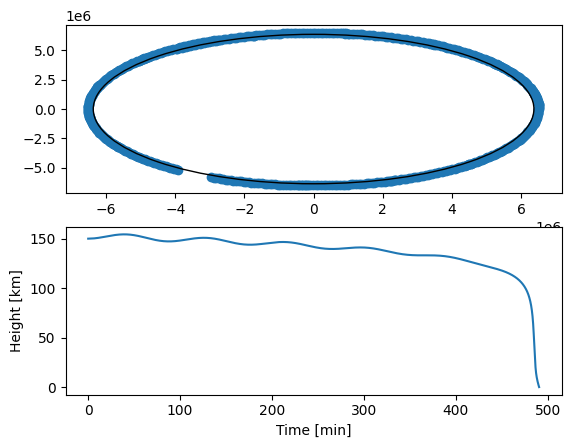

In [7]:
obs_states = obs.observed_states

fig, (ax, ax1) = plt.subplots(2, 1)

ax.scatter(obs_states[:, 0], obs_states[:, 1])
earth = plt.Circle((0, 0), radius=deorbit.constants.EARTH_RADIUS, fill=False)
ax.add_patch(earth)

ax1.plot(np.array(sim_data.times) / 60, (np.linalg.norm(sim_states[:, :2], axis=1) - deorbit.constants.EARTH_RADIUS)/1000)
ax1.set_ylabel("Height [km]")
ax1.set_xlabel("Time [min]")

plt.show()

In [8]:
radar_list = np.arange(1, 30)
satellite_visibility = []
for i in tqdm(radar_list):
    obs = Observer(number_of_radars=i)

    obs.run(sim_states, sim_data.times, 10)

    observation_times = obs.observed_times

    satellite_visibility.append((len(observation_times)/len(sim_data.times))*100)


  0%|          | 0/29 [00:00<?, ?it/s]

 34%|███▍      | 10/29 [00:26<00:50,  2.68s/it]


KeyboardInterrupt: 

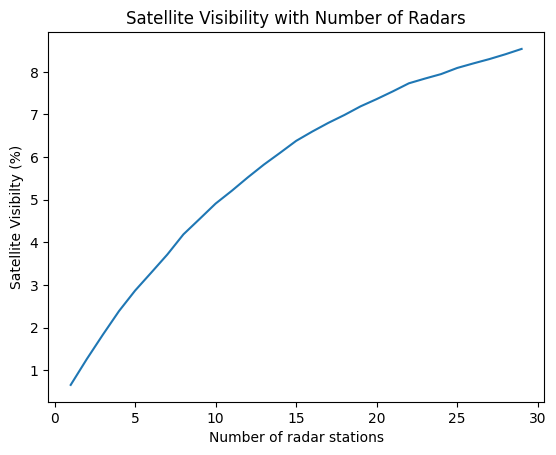

In [ ]:
fig, ax = plt.subplots()

ax.plot(radar_list, satellite_visibility)
ax.set_title('Satellite Visibility with Number of Radars')
ax.set_xlabel('Number of radar stations')
ax.set_ylabel('Satellite Visibilty (%)')
plt.show()

#should plateau to 10% so looks good

In [2]:
#initialising 3D observer class with sim data
obs_3D = Observer(number_of_radars=30, dim=3)


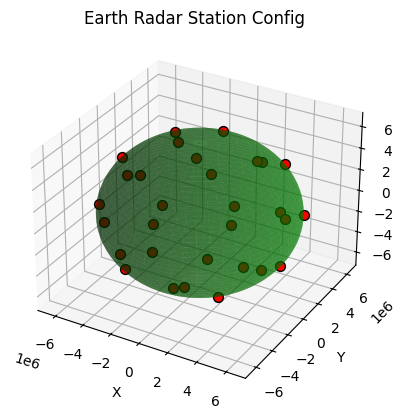

In [3]:
obs_3D.plot_config()